In [2]:
import pennylane as qml
from pennylane import numpy as np

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from skimage.transform import resize


## CVNeuralNetLayers
https://docs.pennylane.ai/en/stable/code/api/pennylane.CVNeuralNetLayers.html

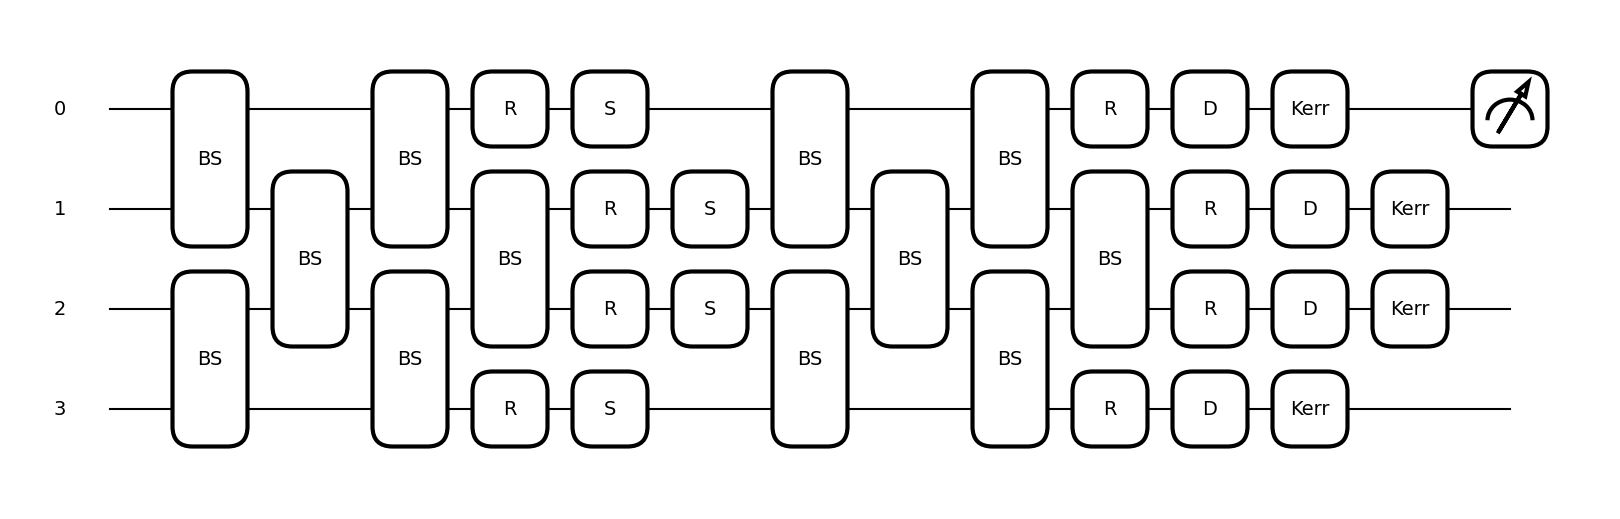

In [5]:
dev = qml.device('default.gaussian', wires=2)

# Define the shapes for the weights of CVNeuralNetLayers
shapes = qml.CVNeuralNetLayers.shape(n_layers=1, n_wires=4)
weights = [np.random.random(shape) for shape in shapes]

# Define the circuit as a QNode
@qml.qnode(dev)
def circuit():
    qml.CVNeuralNetLayers(*weights, wires=[0, 1, 2,3])
    return qml.expval(qml.QuadX(0))  

fig = qml.draw_mpl(circuit)()
plt.show()

## Ansatz: RandomLayers

https://docs.pennylane.ai/en/stable/code/api/pennylane.RandomLayers.html

Result of circuit 1: 1.0000000000000002
Result of circuit 2: 1.0000000000000002


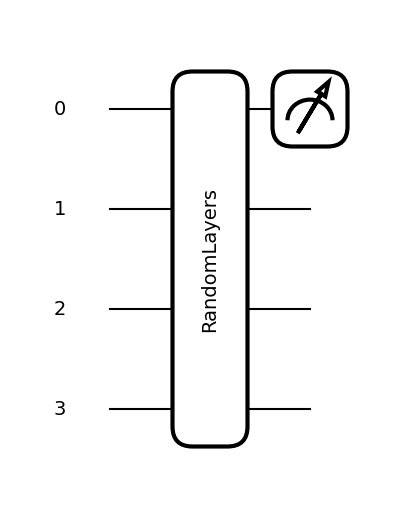

circuit1: 
 0: ───────────────────────────────────┤  <Z>
1: ──RY(0.10)──╭●─────────────────────┤     
2: ──RX(-2.10)─│───RZ(1.40)──RX(0.50)─┤     
3: ────────────╰X─────────────────────┤     


circuit2: 
 0: ───────────────────────────────────┤  <Z>
1: ──RY(0.10)──╭●─────────────────────┤     
2: ──RX(-2.10)─│───RZ(1.40)──RX(0.50)─┤     
3: ────────────╰X─────────────────────┤     


In [15]:
dev = qml.device("default.qubit", wires=4)

weights = np.array([[0.1, -2.1, 1.4, 0.5]])  

@qml.qnode(dev)
def circuit1(weights):
    qml.RandomLayers(weights=weights, wires=range(4), seed=42)
    return qml.expval(qml.Z(0))

@qml.qnode(dev)
def circuit2(weights):
    qml.RandomLayers(weights=weights, wires=range(4),seed=42)
    return qml.expval(qml.Z(0))

result1 = circuit1(weights)
print(f"Result of circuit 1: {result1}")

result2 = circuit2(weights)
print(f"Result of circuit 2: {result2}")

fig = qml.draw_mpl(circuit1)(weights)
plt.show()
print('circuit1: \n', qml.draw(circuit1, level="device")(weights))
print("\n" + "="*40 + "\n") 
print('circuit2: \n', qml.draw(circuit2, level="device")(weights))


## Strongly Entangling Layers

https://docs.pennylane.ai/en/stable/code/api/pennylane.StronglyEntanglingLayers.html

Ergebnis der Messung: 0.7036110202619505


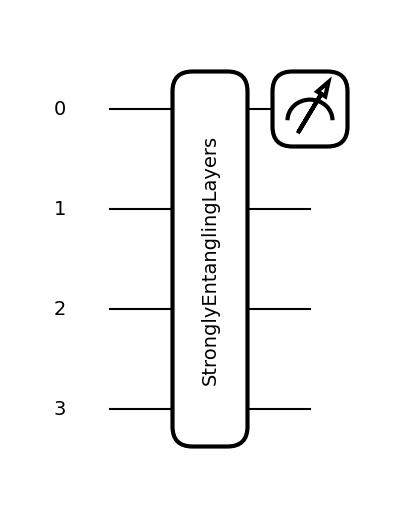

circuit: 
 0: ──Rot(0.62,0.72,0.09)─╭●────╭Z──Rot(0.59,0.08,0.54)──────────────────────╭●─╭Z───────┤  <Z>
1: ──Rot(0.35,0.43,0.13)─│──╭●─│──╭Z────────────────────Rot(0.48,0.98,0.85)─│──╰●─╭Z────┤     
2: ──Rot(0.48,0.05,0.72)─╰Z─│──╰●─│─────────────────────Rot(0.74,0.43,0.58)─│─────╰●─╭Z─┤     
3: ──Rot(0.10,0.74,0.58)────╰Z────╰●────────────────────Rot(0.87,0.44,0.97)─╰Z───────╰●─┤     


In [16]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def circuit(weights):
    qml.StronglyEntanglingLayers(weights=weights, wires=range(4), ranges=[2, 3], imprimitive=qml.ops.CZ)
    return qml.expval(qml.PauliZ(0))

shape = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=4)  # 2 Schichten und 4 Qubits
weights = np.random.random(size=shape)  # Zufällige Gewichtungen für den Schaltkreis

result = circuit(weights)
print(f"Ergebnis der Messung: {result}")

fig = qml.draw_mpl(circuit)(weights)
plt.show()
print('circuit: \n', qml.draw(circuit, level="device")(weights))
